In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [14]:
date = pd.read_table('C:/Users/Lenovo/Pictures/Global Superstore.txt')

date.columns = date.columns.str.replace(' ', '_')
date.head(3)

,Category,City,Country,Customer_ID,Customer_Name,Discount,Market,记录数,Order_Date,Order_ID,...,Sales,Segment,Ship_Date,Ship_Mode,Shipping_Cost,State,Sub-Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,1,2011-01-21 00:00:00.000,CA-2011-148614,...,19,Consumer,2011-01-26 00:00:00.000,Standard Class,0.94,California,Paper,2011,North America,4
2,Office Supplies,Los Angeles,United States,CS-121304,Chad Sievert,0.0,US,1,2011-08-05 00:00:00.000,CA-2011-118962,...,21,Consumer,2011-08-09 00:00:00.000,Standard Class,1.81,California,Paper,2011,North America,32


In [3]:
df=date.groupby('weeknum')['Order_ID'].count().reset_index() # групировка по номеру недели,  когда был размещен заказ
df.head(5)

,weeknum,Order_ID
0,1,381
1,2,550
2,3,604
3,4,568
4,5,568


In [4]:
df0=date.groupby('Order_Date')['Order_ID'].count().reset_index() # групировка по дате,  когда был размещен заказ
df0.head(5)

,Order_Date,Order_ID
0,2011-01-01 00:00:00.000,6
1,2011-01-02 00:00:00.000,1
2,2011-01-03 00:00:00.000,20
3,2011-01-04 00:00:00.000,16
4,2011-01-05 00:00:00.000,7


In [5]:
dfs=date.groupby( 'weeknum')['Sales'].sum().reset_index() # групировка  по сумме продаж за каждую неделю
dfs.head(5)

,weeknum,Sales
0,1,99439
1,2,156319
2,3,152385
3,4,151234
4,5,142319


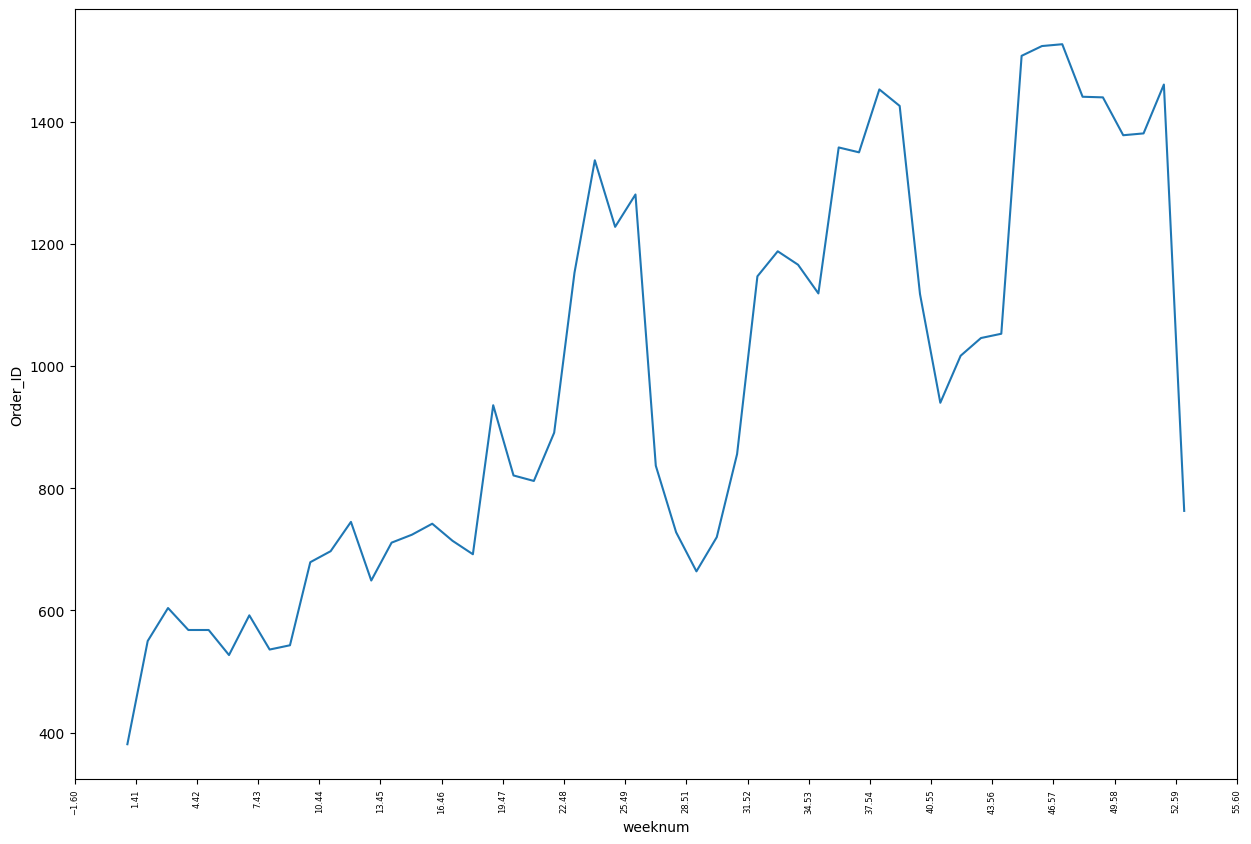

In [6]:
plt.figure(figsize=(15,10))# Вопрос 1. Количество заказов меняется в зависимости от времени(недели)
plot = sns.lineplot(data = df, x ='weeknum', y = 'Order_ID')
plot.xaxis.set_major_locator(ticker.LinearLocator(20))
plt.xticks(rotation = 90, fontsize = 6)
plt.show()  

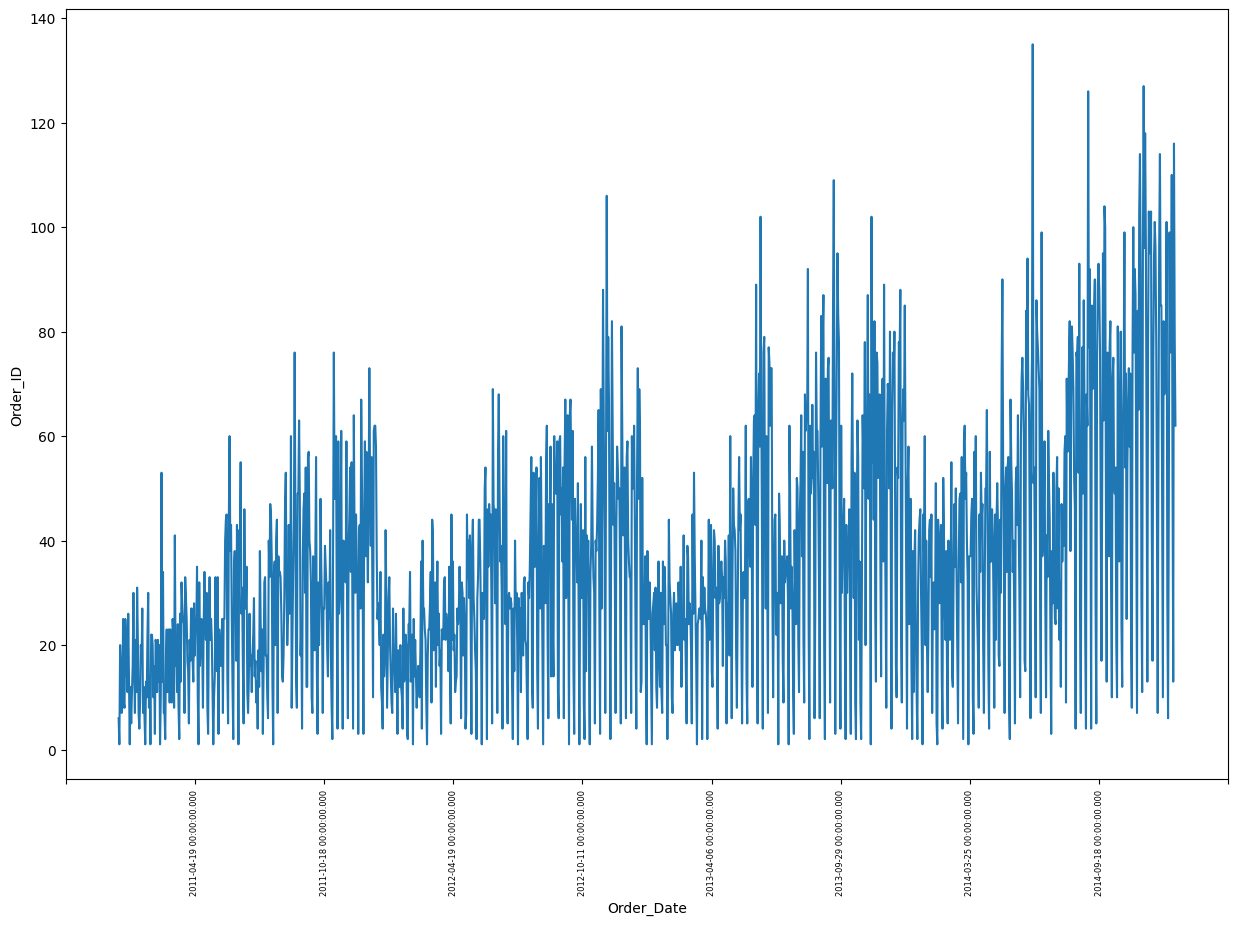

In [10]:
plt.figure(figsize=(15,10)) # Вопрос 1. Количество заказов меняется в зависимости от времени(даты)
plot = sns.lineplot(data = df0, x ='Order_Date', y = 'Order_ID')
plot.xaxis.set_major_locator(ticker.LinearLocator(10))
plt.xticks(rotation = 90, fontsize = 6)
plt.show() 

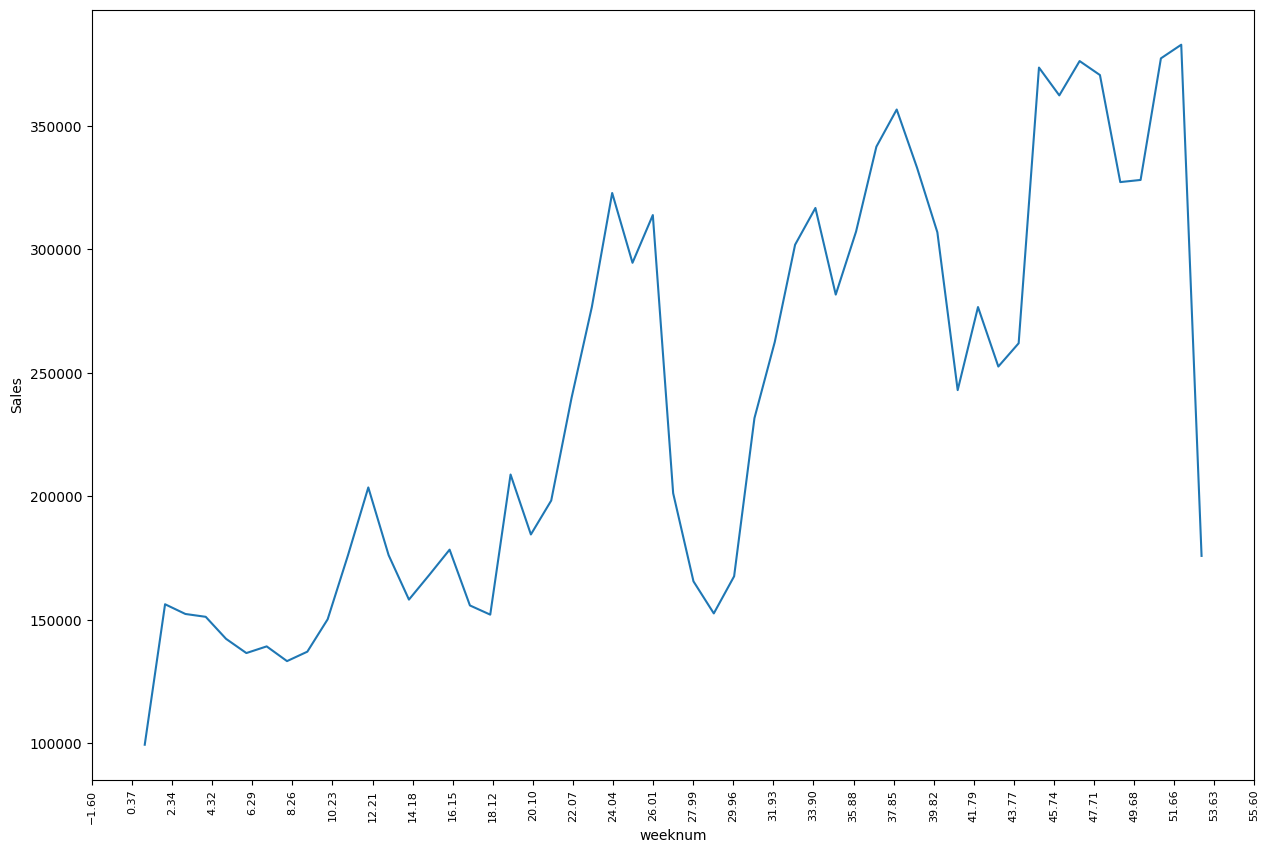

In [11]:
plt.figure(figsize=(15,10)) #  Вопрос.2 Отобразить общие суммы продаж в зависимости от времени
plot = sns.lineplot(data = dfs, y = 'Sales', x = 'weeknum')
plot.xaxis.set_major_locator(ticker.LinearLocator(30))
plt.xticks(rotation = 90, fontsize = 8)
plt.show()  

<Axes: xlabel='Market', ylabel='Sales'>

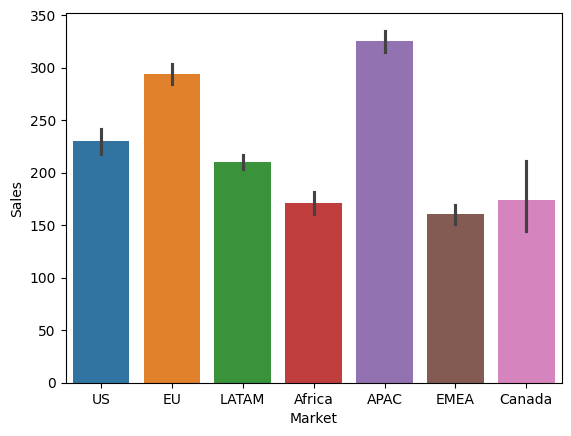

In [12]:
sns.barplot(x=date['Market'], y=date['Sales'], hue=date['Market']) # 2. Отображение суммы продаж в зависимости от рынка

<Axes: xlabel='Discount', ylabel='Profit'>

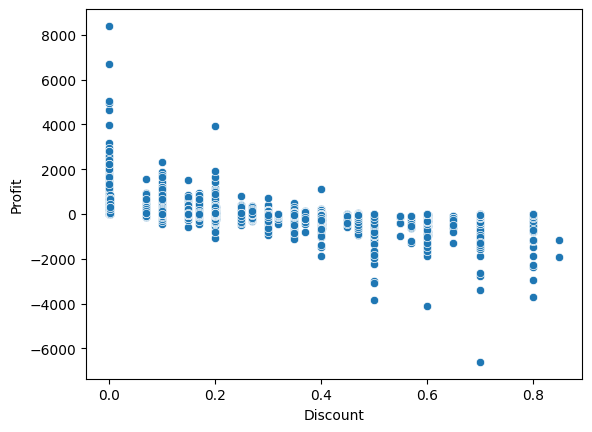

In [13]:
sns.scatterplot(x=date['Discount'], y=date['Profit']) # 3. Влияет ли скидка на прибыльность заказа?чем меньше скидка тем прибыль выше.

<Axes: xlabel='Discount', ylabel='Profit'>

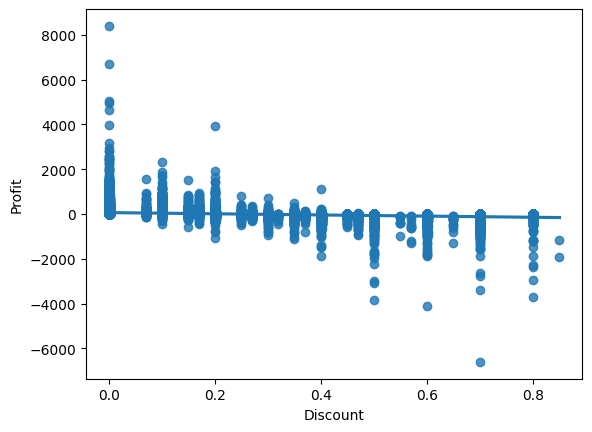

In [14]:

sns.regplot(data = date, x='Discount', y='Profit') #3. Влияет ли скидка на прибыльность заказа? чем меньше скидка, тем прибыль выше.

<Axes: xlabel='Profit', ylabel='Count'>

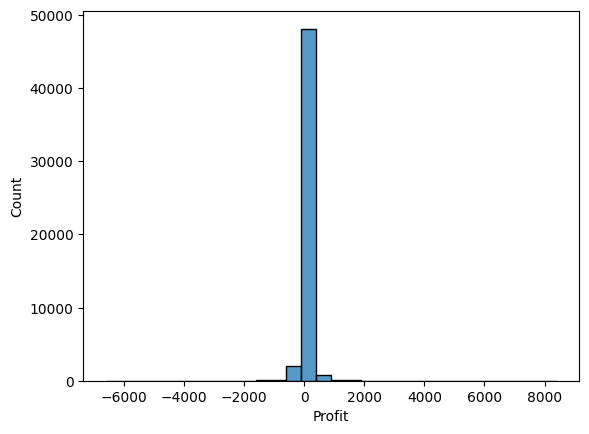

In [16]:
date=pd.read_table('C:/Users/Lenovo/Pictures/Global Superstore.txt')
date.columns = date.columns.str.replace(' ', '_')

sns.histplot(data=date, x='Profit', bins=30) # 4.1. распределение прибыльности заказов. есть ли выбросы.гистограмма. Выброс есть, в районе 0 =Profit, очень большой выброс.

<Axes: xlabel='Profit', ylabel='Density'>

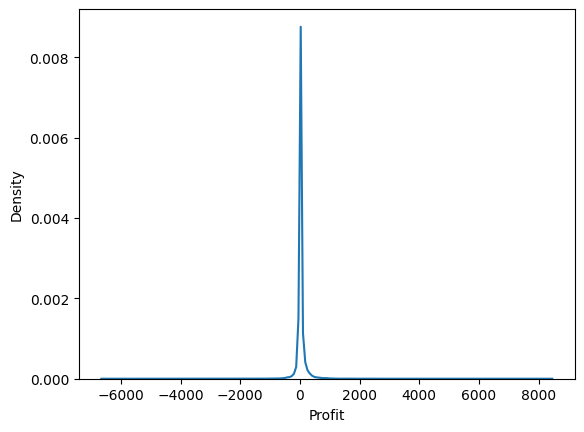

In [17]:

sns.kdeplot(data=date, x='Profit') # 4.1. распределение прибыльности заказов. есть ли выбросы.  гистограмма

In [21]:
dd=date.groupby('weeknum')['Profit'].count().reset_index()
dd.head(5)


,weeknum,Profit
0,1,381
1,2,550
2,3,604
3,4,568
4,5,568


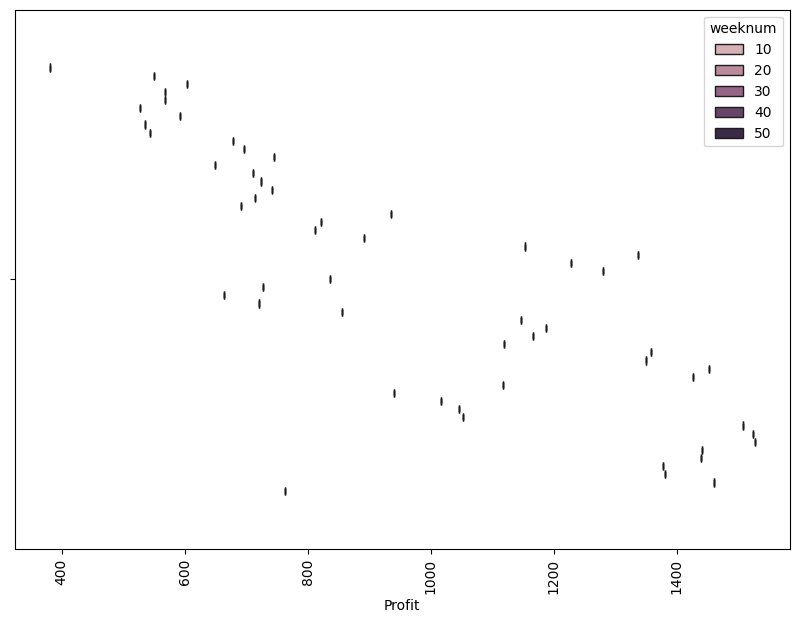

In [23]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90, fontsize=10)
sns.boxplot(data= dd, x='Profit', hue ='weeknum') 
plt.show()#4.1. распределение прибыльности заказов. есть ли выбросы. ящик с усами/ выбросы есть, мало.

In [15]:
da=date.groupby('Shipping_Cost')['Profit'].count().reset_index()
da.head(5)


,Shipping_Cost,Profit
0,0.002,1
1,0.003,1
2,0.010,6
3,0.019,1
4,0.020,6


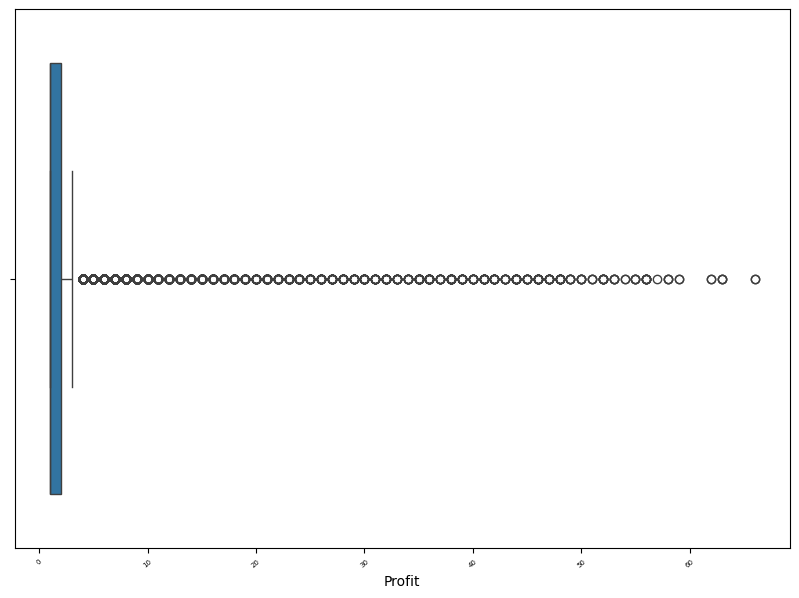

In [19]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90, fontsize=5)
sns.boxplot(data=da, x='Profit')
plt.show() #4.1. распределение прибыльности заказов. есть ли выбросы. ящик с усами. выбросы есть.

<Axes: xlabel='Category', ylabel='Shipping_Cost'>

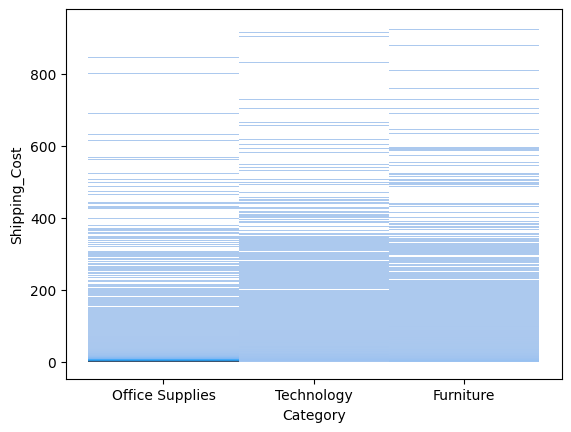

In [9]:
sns.histplot(data = date,  x='Category', y= 'Shipping_Cost') # 4.2. влияет ли категория товара на стоимость доставки??????????

In [5]:
dp=date.groupby('Country')['Profit'].count().reset_index()
dp.head(5)

,Country,Profit
0,Afghanistan,55
1,Albania,16
2,Algeria,196
3,Angola,122
4,Argentina,390


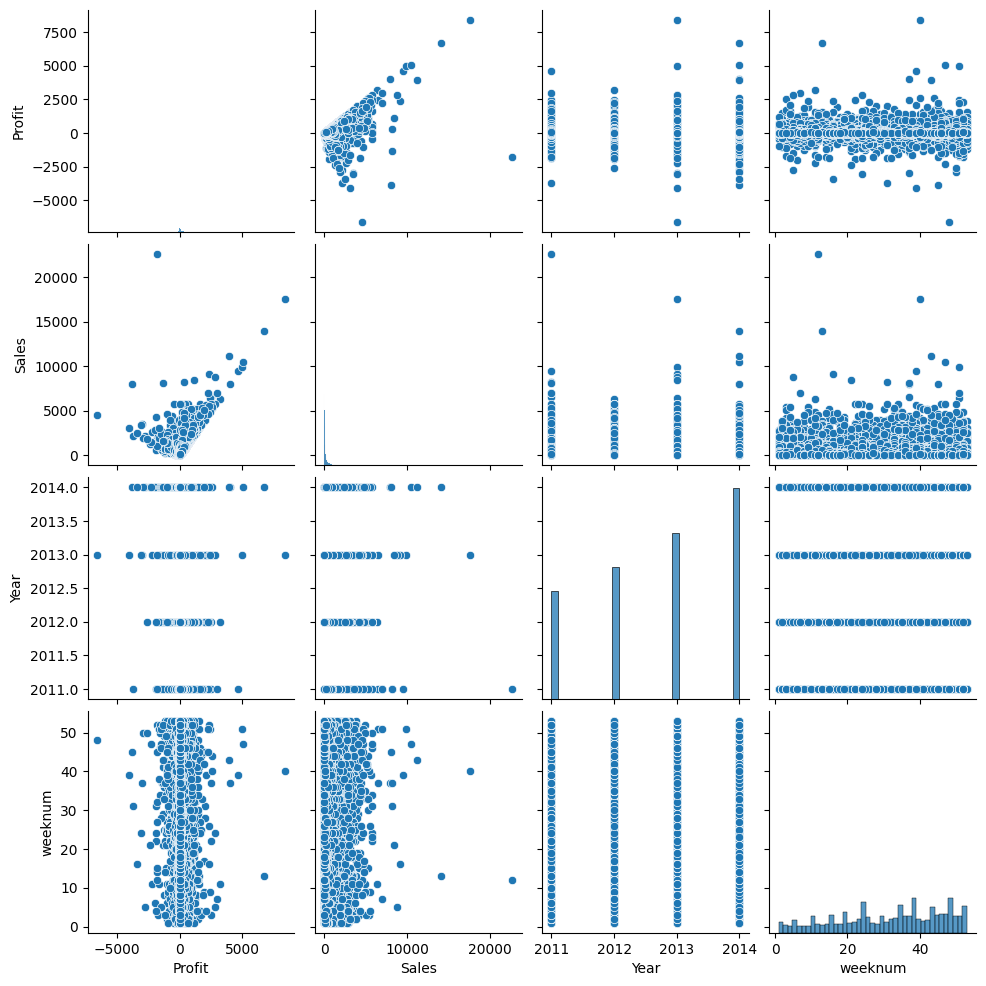

In [8]:
#5.Паирплот.Написать выводы о влиянии показателей друг на друга.
date = pd.read_table('C:/Users/Lenovo/Pictures/Global Superstore.txt')
date.columns = date.columns.str.replace(' ', '_')
date= date[['Profit', 'Sales', 'Year', 'Country', 'weeknum']]
sns.pairplot(date)
plt.show()

Выводы:
1. Profit от weeknum, держится примерно равномерно, но есть незначительные выбросы, единичные.
 Profit от  Years имеет незначительной разброс, с кадым годом как в -, так и в +. есть незначительные единичные отклонения.
 Profit от  Sales   в среднем от  0-5000 каких-то денег как в +, так и в -  прибыль.  От 5000-10000 идет больше в прибыль,
а далее немного в прибыль и есть выброс > 20000.


2. Sales  от weeknum. Общая сумма продаж  по неделям держится в пределах 5000. редкие заказы 5000-12000. 
Есть выбросы(единичные заказы)  примерно 14000, 16000, 23000.
Общая сумма продаж с каждым годом примерно одинаковая, но  из-за единичных крупных заказов есть выбросы.
общая сумма  продаж не зависит от  прибыль. есть выбросы, связанные с дорогими  заказами.


3. Год и недели идут равномерно.
Год от года увеличиваются продажи.
Средняя сумма продаж 6000-7000 в год. в 2011, 2013, 2014 есть дополнительные продажи и выбросы единичные.
в 2013 и 2014 прибыль и убыть увеличивались, за счет разброса заказов(  в зависимости от наличия скидок). есть выбросы.

4.. Год и недели идут равномерно.
общая сумма продаж по неделям шла в районе 5000.
заказы более дорогие становились реже и выбросы были единичными.
Прибыль относительно недель коебалась примерно равномерно, незначительно выше 0.

Могу сделать основной вывод: вся прибыль зависила от скидок, чем больше сикдка, тем меньше прибыль. Общая сумма продажи товара была не велика 4000-6000 в среднем. более дорогих заказов становилось критически меньше. Выбросы были по суммах 16000,23000. Заказы делали в основном люди не выше среднего класса, не зависимо от времени.